# 선형 회귀

나이브베이즈가 분류 작업을 위한 좋은 시작점이 것처럼 선형 회귀 모델은 회귀 작업의 좋은 시작점이다. 선형 회귀 모델은 매우 빠르게 적합되며 해석하기가 아주 쉽기 때문에 인기가 많다. 가장 간단한 형태의 선형 회귀 모델에 익숙하겠지만 그러한 모델을 확장하면 조금 더 복잡한 데이터 행위를 모델링할 수 있다. 

이번 절에서는 우선 다음의 유명한 문제의 수학적 배경에 대해 간단하게 검토하고 나서 데이터에 좀 더 복잡한 패턴을 설명하기 위해 어떻게 선형 모델을 일반호하는지 알아보겠다. 먼저 표준 임포트로 시작하자.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## 단순 선형 회귀

먼저 가장 친숙한 선형 회귀, 즉 데이터에 대한 직선 적합을 알아보자. 직선 적합은 $y = ax + b$ 형식의 모델로, 보통 $a$를 기울기, $b$를 절편이라고 한다.

기울기가 2고 절편이 -5인 선 주변에 흩어져 있는 다음 데이터를 생각해보자. 

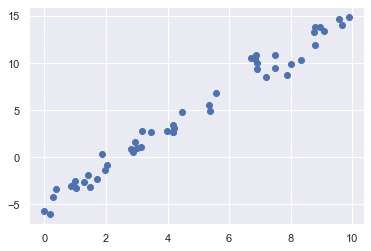

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

scikit-learn의 `LinearRegression` 추정기를 이용해 이 데이터를 적합시키고 가장 잘 적합하는 선을 구성할 수 있다.

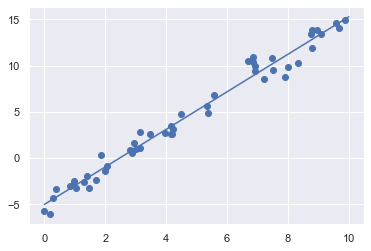

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

데이터의 기울기와 절편은 모델의 적합 모수에 포함되는데, Scikit-learn에서 이 모수는 항상 맨 뒤에 밑줄을 붙여 표시한다. 이 모델에 관련된 모수는 `coef_`와 `inercept_`다.

In [4]:
print("Model slope : ", model.coef_[0])
print("Model intercept : ", model.intercept_)

Model slope :  2.027208810360695
Model intercept :  -4.998577085553202


바라던대로 입력갑과 매우 가까운 것을 확인할 수 있다.

그러나 `LinearRegression` 추정기는 이보다 훨씬 더 많은 일을 할 수 있다. 단순한 직선 적합 외에 다음 형태의 다차원 직선 모델도 처리할 수 있다.

$$ y = a_0 + a_1 x_1 + a_2 x_2 + ... $$

여기에는 여러 개의 $x$ 값이 있다. 기하학적으로 이것은 평면을 3차원 점에 적합시키거나 초평면을 그보다 높은 차원의 점에 적합시키는 것과 유사하다.

이러한 회귀의 다차원적 성격이 시각화를 더 어렵게 만들지만, Numpy의 행렬 곱셈 연산자를 이용해 이제 데이터를 만들어서 실제로 이러한 적합 중 하나를 확인할 수 있다.

In [5]:
rng = np.random.RandomState(1)

X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000153
[ 1.5 -2.   1. ]


여기서 $y$ 데이터는 임의의 $x$값 3개로부터 구성되며, 선형 회귀는 데이터를 구성하는데 사용된 계수를 찾아낸다.

이러한 방식으로 하나의 `LinearRegression` 추정기를 사용해 선이나 면, 초평면을 데이터에 적합시킬 수 있다. 이 접근 방식이 변수들 사이의 선형 관계에 엄격히 제한되는 듯 보이지만, 이 점은 크게 걱정하지 않아도 된다. 

## 기저 함수 회귀

선형 회귀를 변수들 사이의 비선형 관계에 적응시키는 데 사용할 수 있는 비법은 데이터를 기저 함수(basis function)에 따라 변환하는 것이다. 그 한 가지 방식은 이전에 `PolynomialRegression` 파이프라인에서 했다. 그 방법은 우선 다음과 같은 다차원 선형 모델을 취한다.

$$ y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ... $$

그리고 단일 차원 입력값 $x$로부터 $x_1$, $x_2$, $x_3$ 등을 구축한다. 즉, $x_n = f_n(x)$ 를 만드는 것으로, 여기서 $f_n()$은 데이터를 변환하는 함수다.

예를 들어, $f_n(x) = x^n$ 모델은 다음과 같은 다항식 회귀 모델이 된다.

$$ y = a_0 + a_1x + a_2x^2 + a_3x^3 + ... $$

이것은 여전히 선형 모델이라는 점을 알아두자. 선형성이란 계수 $a_n$이 결코 서로 곱하거나 나누지 않음을 말한다. 이 예제에서 사실상 수행한 작업은 1차원 $x$값들을 취해 그것을 더 높은 차원으로 사영함으로써 선형 적합이 $x$와 $y$사이의 더 복잡한 관계를 적합할 수 있게 한 것이다.

### 다항식 기저함수

이 다항식 사영은 scikit-learn에도 `PolynomialFeatures` 변환기를 사용해 구축되어 있을 정도로 매우 유용하다.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

여기서 변환기가 1차원 배열을 각 값의 지수를 취해 3차원 배열로 변환한 것을 확인할 수 있다. 이 새로운 더 높은 차원의 데이터 표현이 이제 선형 회귀에 연결될 수 있다.

앞의 '특징 공학' 편에서 살펴보았듯이 가장 깔끔한 방식은 파이프라인을 사용하는 것이다. 7차 다항식 모델을 이 방식으로 만들어보자. 

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), 
                           LinearRegression())

이 변환이 준비되면 선형 모델을 사용해 $x$와 $y$ 사이의 훨씬 더 복잡한 관계를 적합할 수 있다. 예를 들면, 다음은 노이즈가 섞인 사인 곡선이다. 

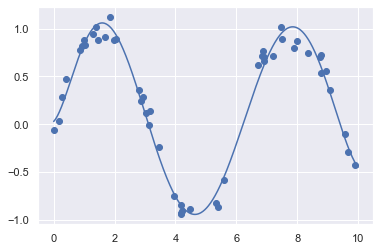

In [8]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

7차 다항식 기저함수를 사용함으로서 선형 모델이 이 비선형 데이터에 훌륭하게 적합될 수 있다.

### 가우스 기저함수

물론 다른 기저함수도 사용할 수 있다. 한가지 유용한 패턴의 예는 다항식 기저함수의 합이 아닌 가우스 기저함수의 합인 모델을 적합하는 것이다. 

이 가우스 기저함수는 사이킷런에 내장되어 있지 않지만, 이 함수를 생성하는 맞춤 변환기를 다음 코드로 작성할 수 있으며 그 결과는 아래와 같다. 

(0.0, 10.0)

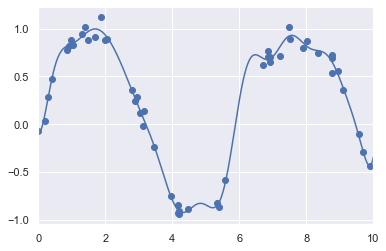

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    # 1차원 입력에 대해 균일한 간격을 가지는 가우시안 특징
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # 데이터 범위를 따라 펼쳐진 N개의 중앙점 생성
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)
    

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10) 

여기서 이 예제를 소개한 이유는 다항식 기저함수가 특별할 것이 없다는 사실을 분명히 하기 위해서다.

데이터 생성 절차상 적절하다고 판단되는 기저함수가 있다면 그것 또한 사용이 가능하다.